In [1]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import image as mp_image
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm


import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F

# Funzioni di attivazione

## Funzione logistica

In [2]:
x = torch.tensor(np.linspace(-20,20,1000))

In [3]:
sigmoid = nn.Sigmoid()

In [4]:
y = sigmoid(x)

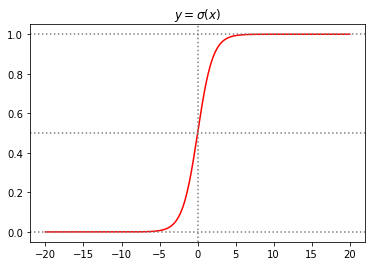

In [5]:
plt.figure()


plt.plot(x,y,color='r')

plt.axhline(y=0.5, color='tab:gray', linestyle='dotted')
plt.axhline(y=1, color='tab:gray', linestyle='dotted')
plt.axhline(y=0, color='tab:gray', linestyle='dotted')
plt.axvline(x=0, color='tab:gray', linestyle='dotted')

#plt.grid(True, which='both')
plt.title("$y=\sigma(x)$")
plt.show()

La derivata della funzione logistica è esprimibile come $$\sigma'(x) = \sigma(x)\cdot (1-\sigma(x))$$

Se plottiamo quest'ultima abbiamo 

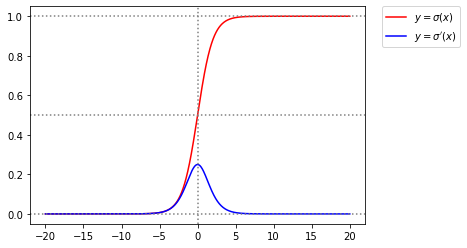

In [6]:
plt.figure()


plt.plot(x,y,color="r",label="$y=\sigma(x)$")
plt.plot(x,y*(1-y),color='b',label="$y=\sigma'(x)$")

plt.axhline(y=0.5, color='tab:gray', linestyle='dotted')
plt.axvline(x=0, color='tab:gray', linestyle='dotted')
plt.axhline(y=1, color='tab:gray', linestyle='dotted')
plt.axhline(y=0, color='tab:gray', linestyle='dotted')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.grid(True, which='both')
plt.show()

## Tangente iperbolica

In [7]:
tanh = nn.Tanh()

In [8]:
y = tanh(x)

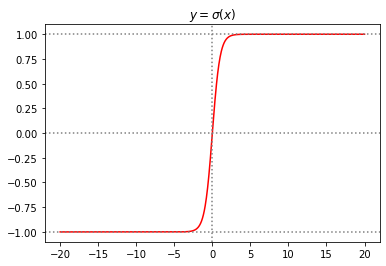

In [9]:
plt.figure()


plt.plot(x,y,color='r')

plt.axhline(y=-1, color='tab:gray', linestyle='dotted')
plt.axhline(y=1, color='tab:gray', linestyle='dotted')
plt.axhline(y=0, color='tab:gray', linestyle='dotted')
plt.axvline(x=0, color='tab:gray', linestyle='dotted')

#plt.grid(True, which='both')
plt.title("$y=\sigma(x)$")
plt.show()

La derivata della tangente iperbolica è $$\frac{\partial}{\partial x}tanh(x) = 1- tanh(x)^2$$

Plottandola otteniamo

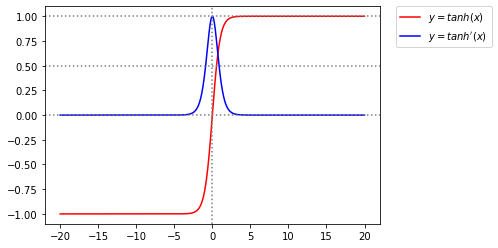

In [10]:
plt.figure()


plt.plot(x,y,color="r",label="$y=tanh(x)$")
plt.plot(x,1-y**2,color='b',label="$y=tanh'(x)$")

plt.axhline(y=0.5, color='tab:gray', linestyle='dotted')
plt.axvline(x=0, color='tab:gray', linestyle='dotted')
plt.axhline(y=1, color='tab:gray', linestyle='dotted')
plt.axhline(y=0, color='tab:gray', linestyle='dotted')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.grid(True, which='both')
plt.show()

### Utilizziamo autograd di Pytorch

In [11]:
x = torch.tensor(np.linspace(-20,20,1000),requires_grad=True)


In [12]:
y = tanh(x)

y.backward(torch.ones(1000))


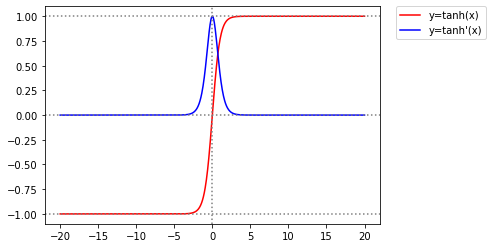

In [13]:
plt.figure()


plt.plot(x.detach().numpy(),y.detach().numpy(),color='r',label="y=tanh(x)")
plt.plot(x.detach().numpy(),x.grad.detach().numpy(),color='b',label="y=tanh'(x)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)



plt.axhline(y=-1, color='tab:gray', linestyle='dotted')
plt.axhline(y=1, color='tab:gray', linestyle='dotted')
plt.axhline(y=0, color='tab:gray', linestyle='dotted')
plt.axvline(x=0, color='tab:gray', linestyle='dotted')

#plt.grid(True, which='both')
plt.show()

Vediamo le altre funzioni di attivazione

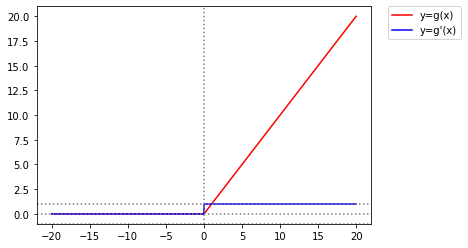

In [14]:
g = F.relu
#g = F.relu6 
#g = F.elu 
#g = F.selu 
#g = F.celu
#g = F.gelu
#g = lambda x: F.leaky_relu(x,.1)
#g = F.tanhshrink
#g = F.softplus

y = g(x)

x.grad.zero_()
y.backward(torch.ones(1000))

plt.figure()

plt.plot(x.detach().numpy(),y.detach().numpy(),color='r',label="y=g(x)")
plt.plot(x.detach().numpy(),x.grad.detach().numpy(),color='b',label="y=g'(x)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)



plt.axhline(y=-1, color='tab:gray', linestyle='dotted')
plt.axhline(y=1, color='tab:gray', linestyle='dotted')
plt.axhline(y=0, color='tab:gray', linestyle='dotted')
plt.axvline(x=0, color='tab:gray', linestyle='dotted')

#plt.grid(True, which='both')
plt.show()



### Automatic differentiation

### Esercizio

Calcolare il grafo e le derivate

In [15]:
x = torch.ones((3,2),requires_grad = True)

y = torch.ones((2,2),requires_grad = True)*0.5

z = torch.ones((3,2),requires_grad = True)*0.25


z1 = torch.mm(x,y)

z2 = z1 + z

y = z2*torch.tensor([[1,0],[2,1],[0,1]]) + z

o = torch.sum(y)


Esploriamo il problema del gradiente evanescente

In [16]:
x = torch.tensor(2.0)

w1 = torch.tensor(1.2,requires_grad=True)
a1 = x*w1
z1 = sigmoid(a1)

w2 = torch.tensor(0.1,requires_grad=True)
a2 = z1*w2
z2 = sigmoid(a2)

w3 = torch.tensor(1.2,requires_grad=True)
a3 = z2*w3
z3 = sigmoid(a3)

w4 = torch.tensor(-0.5,requires_grad=True)
a4 = z3*w4
z4 = sigmoid(a4)

w5 = torch.tensor(1.0,requires_grad=True)
a5 = z4*w5
y = sigmoid(a5)


In [17]:
y

tensor(0.6033, grad_fn=<SigmoidBackward>)

In [18]:

z2.backward()

w1.grad

tensor(0.0038)

In [19]:
with torch.no_grad():
    print(sigmoid(a2)*(1-sigmoid(a2))*w2*sigmoid(a1)*(1-sigmoid(a1))*x)

tensor(0.0038)


Riscriviamo il tutto usando la RELU

In [20]:
x = torch.tensor(2.0)

w1 = torch.tensor(1.0,requires_grad=True)
a1 = x*w1
z1 = sigmoid(a1)

w2 = torch.tensor(0.1,requires_grad=True)
a2 = z1*w2
z2 = sigmoid(a2)

w3 = torch.tensor(1.2,requires_grad=True)
a3 = z2*w3
z3 = sigmoid(a3)

w4 = torch.tensor(0.5,requires_grad=True)
a4 = z3*w4
z4 = sigmoid(a4)

w5 = torch.tensor(1.0,requires_grad=True)
a5 = z4*w5
y = sigmoid(a5)



In [21]:
y

tensor(0.6412, grad_fn=<SigmoidBackward>)

In [22]:

y.backward()

w1.grad

tensor(3.9971e-05)

# Reti convoluzionali

Riprendiamo il dataset MNIST. 


In [2]:
import torchvision
import torchvision.transforms as transforms


batch_size = 64

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [3]:
image, label = train_dataset[0]

print(image.shape)

torch.Size([1, 28, 28])


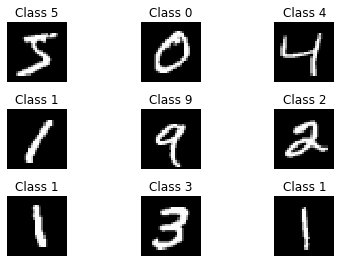

In [4]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    image, label = train_dataset[i]
    plt.imshow(image[0],cmap='gray', interpolation='none')
    plt.title("Class {}".format(label))
    plt.axis('off')

In [5]:
class LeNet(nn.Module):
    def __init__(self,input_size):
        super(LeNet, self).__init__()
        # Convolutional Layers
        self.features = nn.Sequential(
            nn.Conv2d(1, 6, 5),
            nn.Tanh(),
            nn.AvgPool2d(2,stride = 2), 
            nn.Conv2d(6, 16, 5),
            nn.Tanh(),
            nn.AvgPool2d(2,stride = 2)
        )
        fm_size = ((input_size - 6 )//2 - 5)//2 + 1
        fc_layer_in_size = 16*fm_size*fm_size    

        # Linear layers
        self.fc = nn.Sequential(
            nn.Linear(fc_layer_in_size, 120),
            nn.Tanh(),
            nn.Linear(120, 84),
            nn.Tanh(),
            nn.Linear(84, 10)
        )


    def forward(self, x):
        features = self.features(x)
        
        # Flatten the tensor along the second dimension
        features_flattened = features.view(features.size(0),-1)  

        out = self.fc(features_flattened)
        
        output = F.log_softmax(out, dim=1)
        
        return output

### Esercizio

Modificare la rete utilizzando attivazioni `ReLU` e `MaxPool`

In [6]:


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

lenet_model = LeNet(28).to(device)

In [7]:
lenet_model

LeNet(
  (features): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (fc): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [8]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
learning_rate = 0.0005
optimizer = torch.optim.Adam(lenet_model.parameters(), lr=learning_rate)  


num_epochs = 3

train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(num_epochs + 1)]

In [9]:
# The number of steps for each epoch, defined by the number of instances divided by the batch size. 
total_step = len(train_loader)

def train(epoch,model,criterion,optimizer,reshape=True):
    for batch_idx, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        if reshape:
            images = images.reshape(-1, 28*28)
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (batch_idx+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch, num_epochs, batch_idx+1, total_step, loss.item()))
        
        train_losses.append(loss.item())
        train_counter.append(
        (batch_idx*batch_size) + ((epoch-1)*len(train_loader.dataset)))
        
def test(model,criterion,reshape=True):
    test_loss = 0
    correct = 0
    
    with torch.no_grad():
        for images, labels in test_loader:
            if reshape:
                images = images.reshape(-1, 28*28)
                
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            
            correct += (predicted == labels).sum().item()
            
            loss = criterion(outputs,labels,)
            
            test_loss += loss.item()
            
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [10]:
test(lenet_model,criterion,reshape=False)
for epoch in range(1,num_epochs+1):
    train(epoch,lenet_model,criterion,optimizer,reshape=False)
    test(lenet_model,criterion,reshape=False)


Test set: Avg. loss: 0.0363, Accuracy: 999/10000 (10%)

Epoch [1/3], Step [100/938], Loss: 0.7000
Epoch [1/3], Step [200/938], Loss: 0.5967
Epoch [1/3], Step [300/938], Loss: 0.3227
Epoch [1/3], Step [400/938], Loss: 0.5177
Epoch [1/3], Step [500/938], Loss: 0.2200
Epoch [1/3], Step [600/938], Loss: 0.1341
Epoch [1/3], Step [700/938], Loss: 0.1192
Epoch [1/3], Step [800/938], Loss: 0.2251
Epoch [1/3], Step [900/938], Loss: 0.2018

Test set: Avg. loss: 0.0028, Accuracy: 9457/10000 (95%)

Epoch [2/3], Step [100/938], Loss: 0.1811
Epoch [2/3], Step [200/938], Loss: 0.0930
Epoch [2/3], Step [300/938], Loss: 0.0743
Epoch [2/3], Step [400/938], Loss: 0.1574
Epoch [2/3], Step [500/938], Loss: 0.1723
Epoch [2/3], Step [600/938], Loss: 0.1195
Epoch [2/3], Step [700/938], Loss: 0.0438
Epoch [2/3], Step [800/938], Loss: 0.0526
Epoch [2/3], Step [900/938], Loss: 0.0397

Test set: Avg. loss: 0.0016, Accuracy: 9687/10000 (97%)

Epoch [3/3], Step [100/938], Loss: 0.1136
Epoch [3/3], Step [200/938], 

In [11]:
lenet_model.features

Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): Tanh()
  (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): Tanh()
  (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
)

In [12]:
extractor_1 = lambda im: lenet_model.features[:1](im.unsqueeze(0))

extractor_2 = lambda im: lenet_model.features[:4](im.unsqueeze(0))

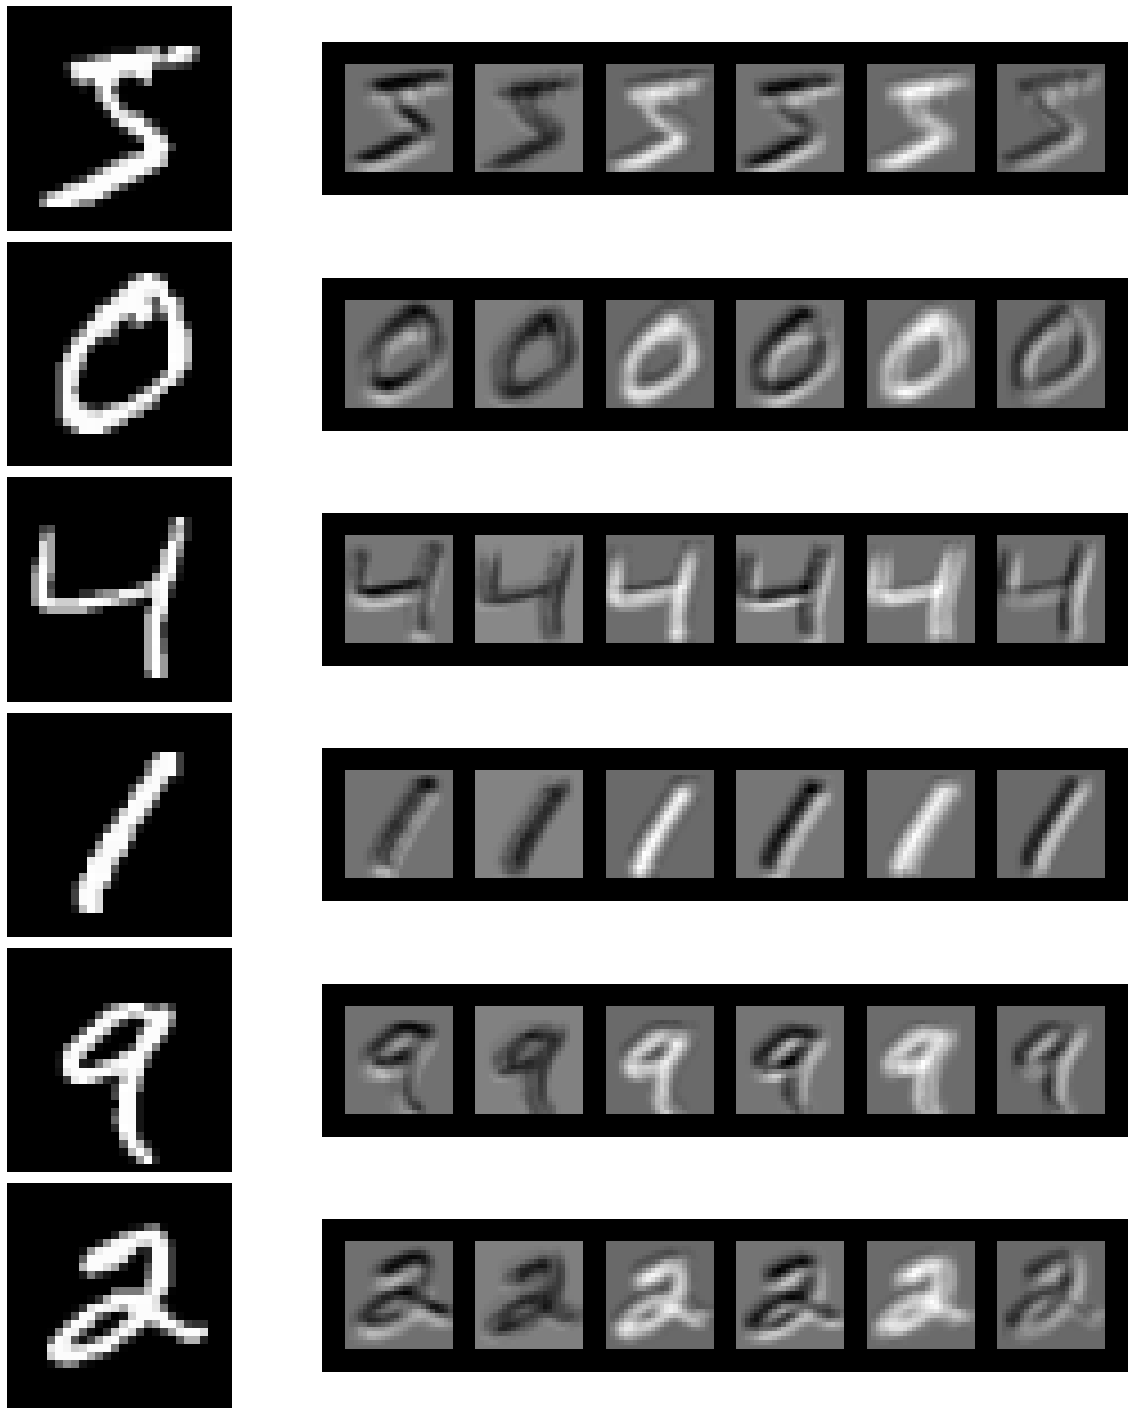

In [13]:
from torchvision.utils import make_grid

plt.figure(figsize=(20,20))

n = 6
k = 1

for i in range(n):
    plt.subplot(n,2,k)
    k = k+1
    plt.tight_layout()
    image, label = train_dataset[i]
    plt.imshow(image[0],cmap='gray', interpolation='none')
    plt.axis('off')
    features = extractor_1(image).permute(1,0,2,3)
    img = make_grid(features,padding=5,normalize=True).permute(1,2,0).detach().numpy()
    plt.subplot(n,2,k)
    k = k + 1
    plt.tight_layout()
    plt.imshow(img,cmap='gray', interpolation='none')
    plt.axis('off')


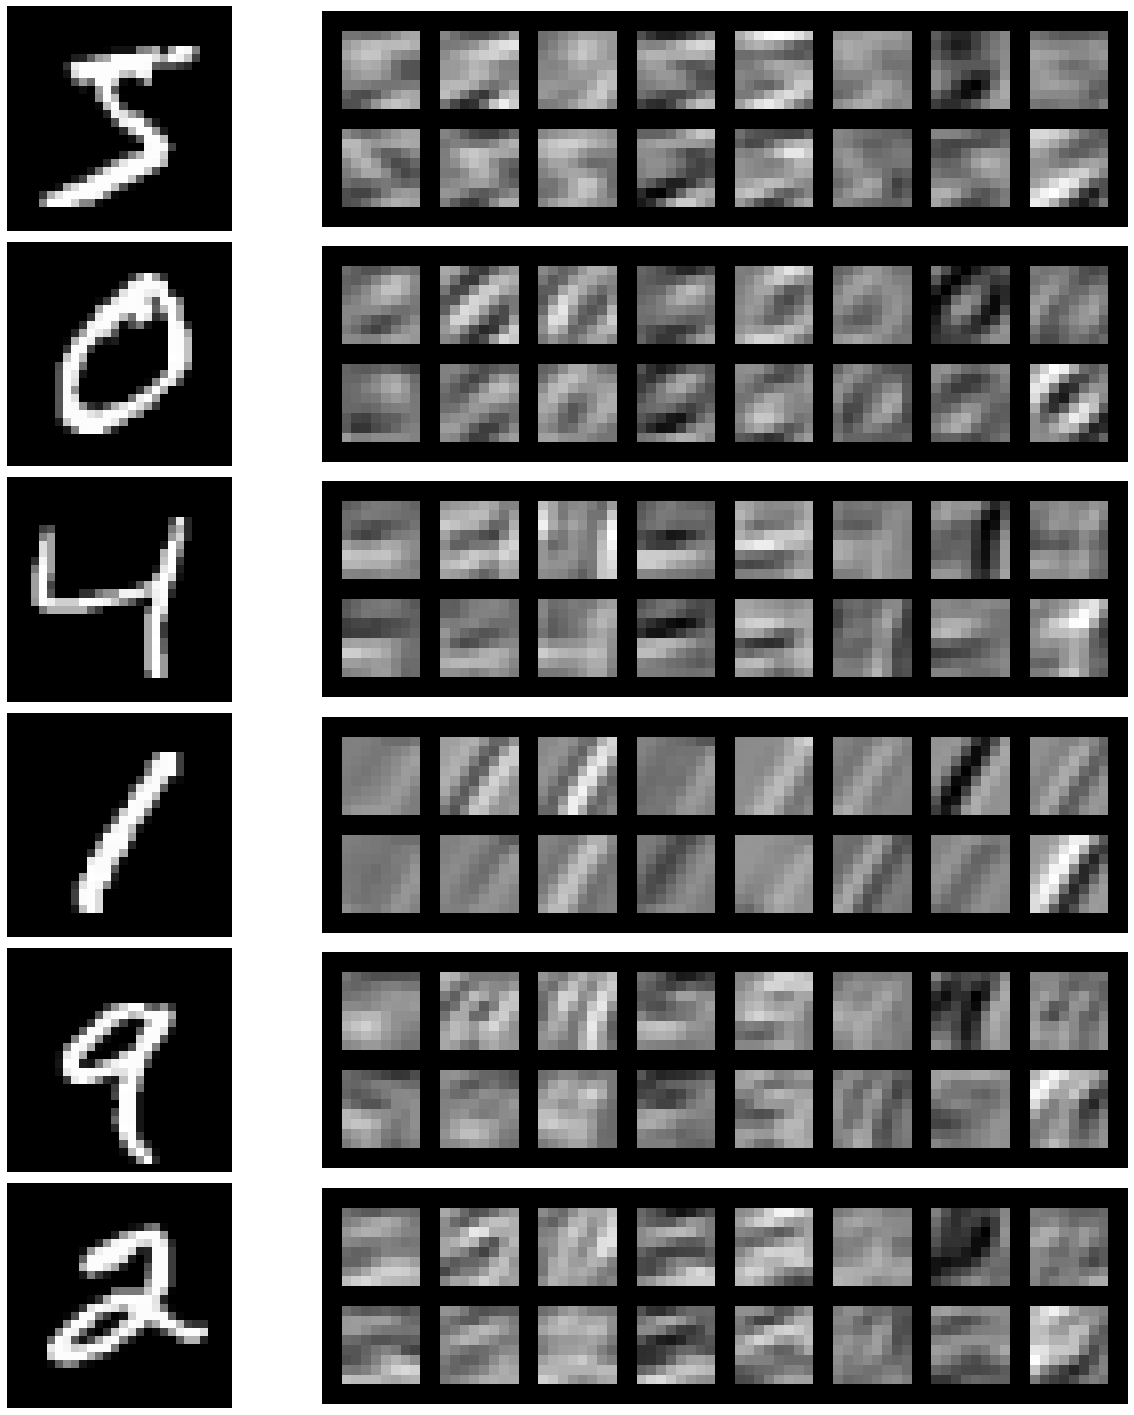

In [14]:

plt.figure(figsize=(20,20))

n = 6
k = 1

for i in range(n):
    plt.subplot(n,2,k)
    k = k+1
    plt.tight_layout()
    image, label = train_dataset[i]
    plt.imshow(image[0],cmap='gray', interpolation='none')
    plt.axis('off')
    features = extractor_2(image).permute(1,0,2,3)
    img = make_grid(features,normalize=True).permute(1,2,0).detach().numpy()
    plt.subplot(n,2,k)
    k = k + 1
    plt.tight_layout()
    plt.imshow(img,cmap='gray', interpolation='none')
    plt.axis('off')



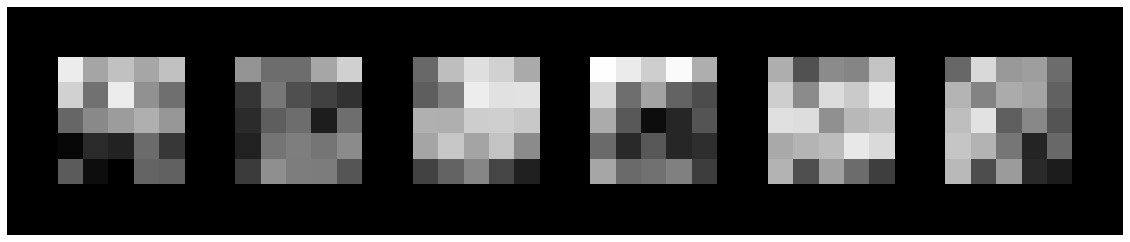

In [15]:
plt.figure(figsize=(20,20))

kernels = lenet_model.features[0].weight.detach()
img = make_grid(kernels,normalize=True).permute(1, 2, 0)
plt.imshow(img, interpolation='none',cmap=cm.hot)
plt.axis('off')


plt.show()


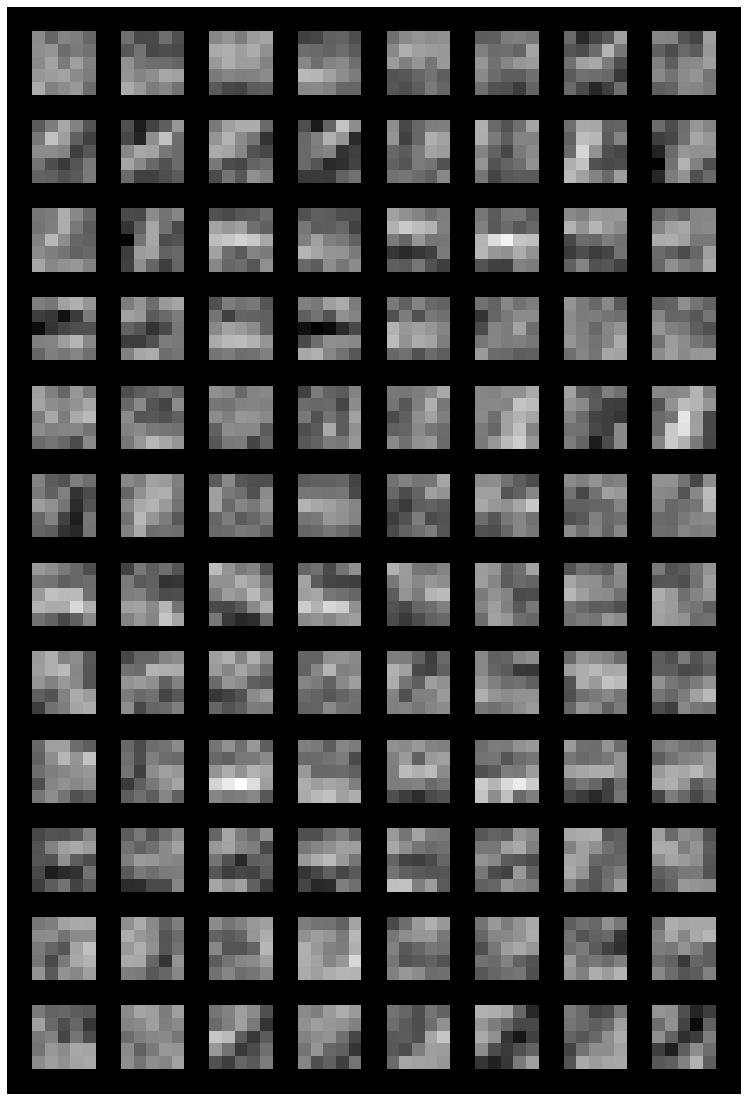

In [16]:
plt.figure(figsize=(20,20))

kernels = lenet_model.features[3].weight

kernels = kernels.view(kernels.shape[0]*kernels.shape[1],1,kernels.shape[2],kernels.shape[3])

img = make_grid(kernels,normalize=True)

img = img.permute(1, 2, 0).detach().numpy()


plt.imshow(img, interpolation='none',cmap=cm.hot)
plt.axis('off')

plt.show()

### Saliency maps

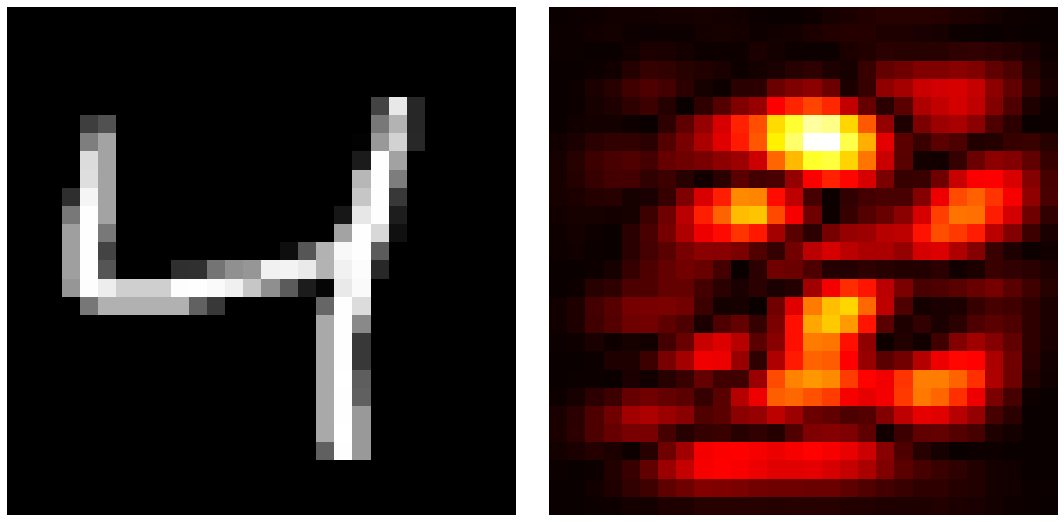

In [17]:
idx_class = 4

idxs = np.where(train_dataset.targets == idx_class)
idx = idxs[0][0]

image, _ = train_dataset[idx]

image = image.unsqueeze(0)


# we would run the model in evaluation mode
lenet_model.eval()

# we need to find the gradient with respect to the input image, so we need to call requires_grad_ on it
image.requires_grad_()



#forward pass through the model to get the scores
scores = lenet_model(image)

# Get the index corresponding to the maximum score and the maximum score itself.
score_max_index = scores.argmax()
score_max = scores[0,score_max_index]

'''
backward function on score_max performs the backward pass in the computation graph and calculates the gradient of 
score_max with respect to nodes in the computation graph
'''
score_max.backward()


#Saliency would be the gradient with respect to the input image now. 
saliency, _ = torch.max(image.grad.data.abs(),dim=1)


plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.tight_layout()
plt.imshow(image[0][0].detach().numpy(),cmap='gray', interpolation='none')
plt.axis('off')

# code to plot the saliency map as a heatmap
plt.subplot(1,2,2)
plt.tight_layout()
plt.imshow(saliency[0], cmap=plt.cm.hot)
plt.axis('off')
plt.show()

## Esercizio

Adattare la rete LeNet per effettuare classificazione sul dataset CIFAR10


CIFAR-10 consiste di 60000 immagini  32x32 (RGB), etichettate con un intero che corrisponde a 10 classi: airplane (0), automobile (1), bird (2), cat (3), deer (4), dog (5), frog (6), horse (7), ship (8), truck (9).


In [43]:
tensor_cifar10 = torchvision.datasets.CIFAR10(root='data', train=True, download=True,transform=transforms.ToTensor())
tensor_cifar10_val = torchvision.datasets.CIFAR10(root='data', train=False, download=True,transform=transforms.ToTensor())



Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


# Tests